In [1]:
import tensorflow as tf 
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator  # Data Augumentation


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
batchsize=8

In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'mrlEyes_2018_01\Prepared Data\Train_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'mrlEyes_2018_01\Prepared Data\Train_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 40752 images belonging to 2 classes.
Found 10187 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'E:\Yesha\3rd Year\6th Sem\CV\Project\mrlEyes_2018_01\Prepared Data\Test_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 33959 images belonging to 2 classes.


In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))#3-colour
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel) 
hmodel = Dropout(0.5)(hmodel) 
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [7]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [8]:
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [9]:
checkpoint = ModelCheckpoint(r'E:\Yesha\3rd Year\6th Sem\CV\Project\model.h5',monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,epochs=5,callbacks=callbacks,validation_data=validation_data,steps_per_epoch=train_data.samples//batchsize,validation_steps=validation_data.samples//batchsize)

C:\Users\dellc\AppData\Local\Temp\ipykernel_48484\1828842997.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,epochs=5,callbacks=callbacks,validation_data=validation_data,steps_per_epoch=train_data.samples//batchsize,validation_steps=validation_data.samples//batchsize)


Epoch 1/5
5094/5094 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.9213
Epoch 1: val_loss improved from inf to 0.29188, saving model to E:\Yesha\3rd Year\6th Sem\CV\Project\model.h5
5094/5094 [==============================] - 1975s 385ms/step - loss: 0.2008 - accuracy: 0.9213 - val_loss: 0.2919 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 2/5
5094/5094 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9352
Epoch 2: val_loss improved from 0.29188 to 0.28271, saving model to E:\Yesha\3rd Year\6th Sem\CV\Project\model.h5
5094/5094 [==============================] - 1555s 305ms/step - loss: 0.1677 - accuracy: 0.9352 - val_loss: 0.2827 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 3/5
5094/5094 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9396
Epoch 3: val_loss improved from 0.28271 to 0.25868, saving model to E:\Yesha\3rd Year\6th Sem\CV\Project\model.h5
5094/5094 [==============================] - 1556s 305ms/step - loss:

In [11]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

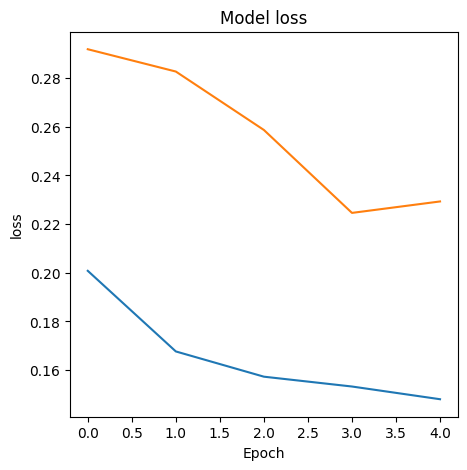

In [12]:
# from keras.applications.InceptionV3 import preprocess_input
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

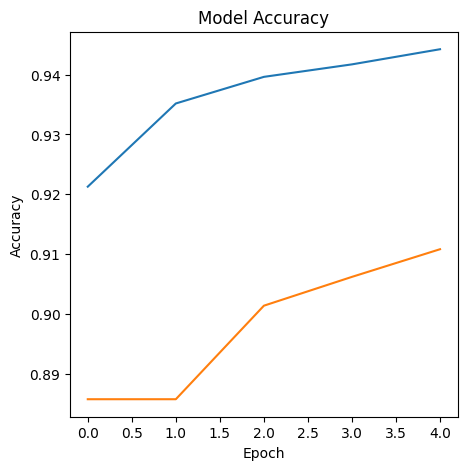

In [17]:
# from keras.applications.InceptionV3 import preprocess_input
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(validation_data)

y_true = validation_data.classes

cm = confusion_matrix(y_true, y_pred)

print(cm)

1274/1274 [==============================] - 253s 196ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [14]:
loss_tr, acc_tr = model.evaluate_generator(train_data)
print("Accuracy for the training data: ", acc_tr)
print("Loss for the training data: ",loss_tr)

C:\Users\dellc\AppData\Local\Temp\ipykernel_48484\1287938080.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_tr, acc_tr = model.evaluate_generator(train_data)


Accuracy for the training data:  0.9538427591323853
Loss for the training data:  0.12727773189544678


In [15]:
loss_vr, acc_vr = model.evaluate_generator(validation_data)
print("Accuracy for the validation data: ", acc_vr)
print("Loss for the validation data: ",loss_vr)

C:\Users\dellc\AppData\Local\Temp\ipykernel_48484\1081451069.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_vr, acc_vr = model.evaluate_generator(validation_data)


Accuracy for the validation data:  0.9033081531524658
Loss for the validation data:  0.23575200140476227


In [16]:
loss_test, acc_test = model.evaluate_generator(test_data)
print("Accuracy for the test data: ", acc_test)
print("Loss for the test data: ",loss_test)

C:\Users\dellc\AppData\Local\Temp\ipykernel_48484\2540568620.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_test, acc_test = model.evaluate_generator(test_data)


Accuracy for the test data:  0.8754969239234924
Loss for the test data:  0.30772268772125244
